<h1 style=color:red>Give Me Some Credit</h1>

<h3 style=color:red>Import Libraries, Functions & Data</h3>

In [629]:
import os                                     # Importing files.
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import pylab as pl

# Displaying figures.
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
# Displaying tabulated data.
from IPython.display import HTML, display
import tabulate                              
tabulate.PRESERVE_WHITESPACE = False

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

def examinePercentiles(data, percentile_threshold, step_size = 0.001):
    """
        # Purpose: To examine the bucketiting of data above a threshold percentile. Used to detect outliers.
        # Inputs: 
        #    data :  list   : Data to examine.
        #    percentile_threshold:  dbl   :  Upper percentile threshold cut-off.
        #    step_size  : dbl : Increments for buckets.
    """
    i = percentile_threshold;
    number_of_points = np.empty((0))
    percentile = np.empty((0))
    cut_off = np.empty((0))
    number_of_points_in_current_bin = np.empty((0))
    while (i<1):
        i = i + step_size
        if i>1:
            i=1

        if len(percentile)<1:
            number_of_points_up_to_previous_bin = 0
        else:
            number_of_points_up_to_previous_bin = sum(data <= data.quantile(percentile[-1]))

        number_of_points_up_to_current_bin = sum(data <= data.quantile(i))
        number_of_points_in_current_bin = np.append(number_of_points_in_current_bin, number_of_points_up_to_current_bin - number_of_points_up_to_previous_bin)
        number_of_points = np.append(number_of_points, number_of_points_up_to_current_bin)
        cut_off = np.append(cut_off, round(data.quantile(i),2))

        percentile = np.append(percentile, round(i,4))
        if len(percentile)>0:
            continue
            #print( "cur bin:" + str(number_of_points_up_to_current_bin) +  " pre bin: " + str(number_of_points_up_to_previous_bin) + " Last percentile: " + str(percentile[-1]) + " Curr percentile: " + str(i) )    
    df = pd.DataFrame(data = np.column_stack((percentile,number_of_points,number_of_points_in_current_bin, cut_off)), columns = ['Percentile','# Examples to Percentile','# Examples in bin','Example Level']) 
    return df

def createCorrelationHeatMap(data):
    """ Purpose: To generate a correlation heatmap of the data. """
    corr = data.corr()
    fig = plt.figure(figsize=(10,10))    
    ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap = "RdBu_r",xticklabels=True, yticklabels=True, cbar=True)
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')          
    ax.tick_params(axis='x', colors='white')       #set the color of xticks
    ax.tick_params(axis='y', colors='white')       #set the color of yticks
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
    
def plot_roc_curve(false_positive_rate, true_positive_rate, label="ROC Curve"):
    """
        Purpose: To plot an ROC curve.
    """
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=1)
    plt.plot([0,1],[0,1], "r--") 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate") 
    
    title_obj = ax.set_title(label)
    plt.setp(title_obj, color='w')                     # Individual title colours.
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')          
    ax.tick_params(axis='x', colors='white')       #set the color of xticks
    ax.tick_params(axis='y', colors='white')       #set the color of yticks    
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    plt.grid(b=True, which='major', color='gray', linestyle='--')
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
    

def plot_feature_importances(clf):
    """
        Purpose: To plot the importance of features fitted.
        Input: The model fit.
    """
    n_features = X.shape[1]
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)        
    plt.barh(range(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)    
    plt.grid(b=True, which='major', color='gray', linestyle='--')
    title_obj = ax.set_title("Feature Importance for Model")
    plt.setp(title_obj, color='w')                     # Individual title colours.
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')          
    ax.tick_params(axis='x', colors='white')       #set the color of xticks
    ax.tick_params(axis='y', colors='white')       #set the color of yticks    
    
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [630]:
working_directory = os.getcwd()
data_path = "data"
file_training = "GiveMeSomeCredit-training.csv"
file_testing = "GiveMeSomeCredit-testing.csv"

file_full_path_training = os.path.join(working_directory, data_path, file_training)
file_full_path_testing = os.path.join(working_directory, data_path, file_testing)

if not os.path.exists(file_full_path_training):
    print("Could not find file: " + file_full_path_training)
else:
    train_df = pd.read_csv(file_full_path_training)    
    test_df = pd.read_csv(file_full_path_testing)

<h3 style=color:lightblue>Descriptive Statistics</h3>

In [631]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [632]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [633]:
train_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [634]:
train_df.describe().round(decimals=2)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


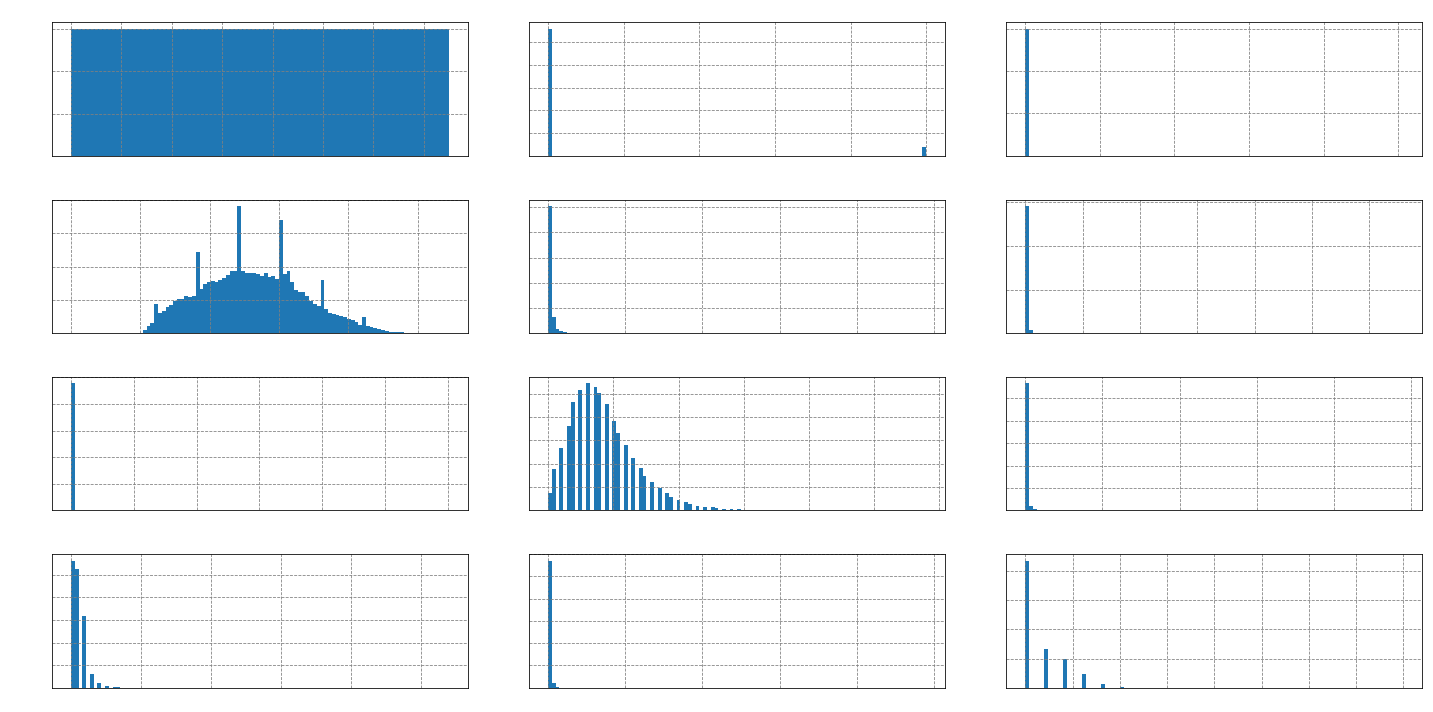

In [635]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='w')                     # Individual title colours.

        ax.xaxis.label.set_color('white')  
        ax.yaxis.label.set_color('white')          
        ax.tick_params(axis='x', colors='white')       #set the color of xticks
        ax.tick_params(axis='y', colors='white')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(train_df, train_df.columns, 4, 3)

In [636]:
print(train_df.duplicated().value_counts())
print(test_df.duplicated().value_counts())

False    150000
dtype: int64
False    101503
dtype: int64


In [637]:
def missing_values_table(df):
    """ Purpose: To examine a Pandas dataframe and output the list of columns with missing data (NaN or blanks).
        Returns: DataFrame with two columns.  Missing Values    AND   Missing as a % of Total Values.
    """
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns
        
missing_values_table(train_df)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MonthlyIncome,29731,19.8
NumberOfDependents,3924,2.6


c:\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Log Monthlty income')

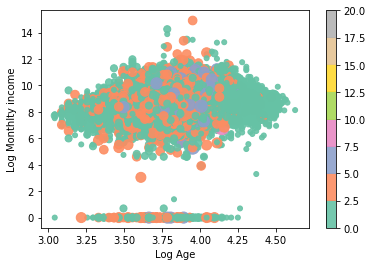

In [638]:
plt.scatter(data=train_df,x=np.log(train_df['age']),y=np.log(train_df['MonthlyIncome']),alpha=.9,
            s=train_df['NumberOfDependents']*25,c=train_df.NumberOfDependents,cmap='Set2')
plt.colorbar()
plt.xlabel('Log Age')
plt.ylabel('Log Monthlty income')

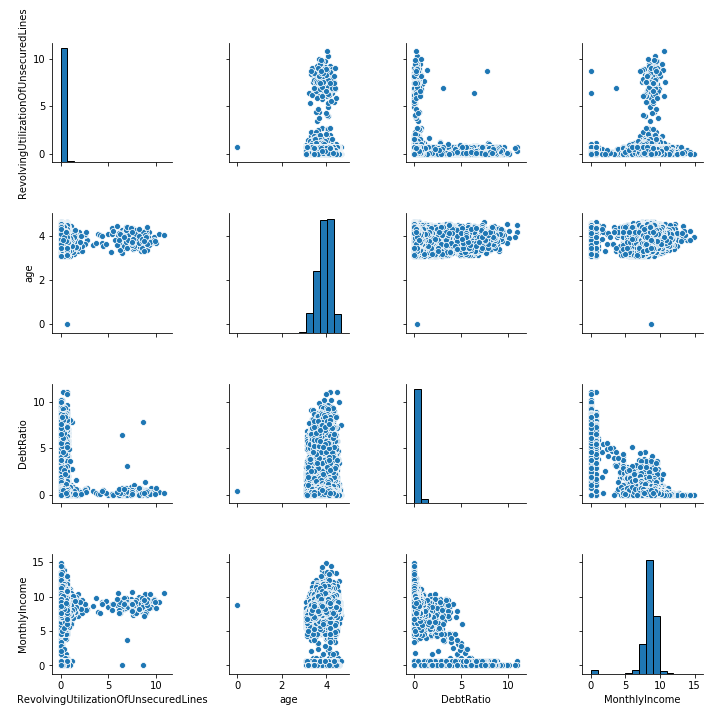

In [639]:
sns.pairplot(np.log(train_df[['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome']]+1).dropna(axis=0,how='any'),
             diag_kws=dict(bins=15,edgecolor='black'))

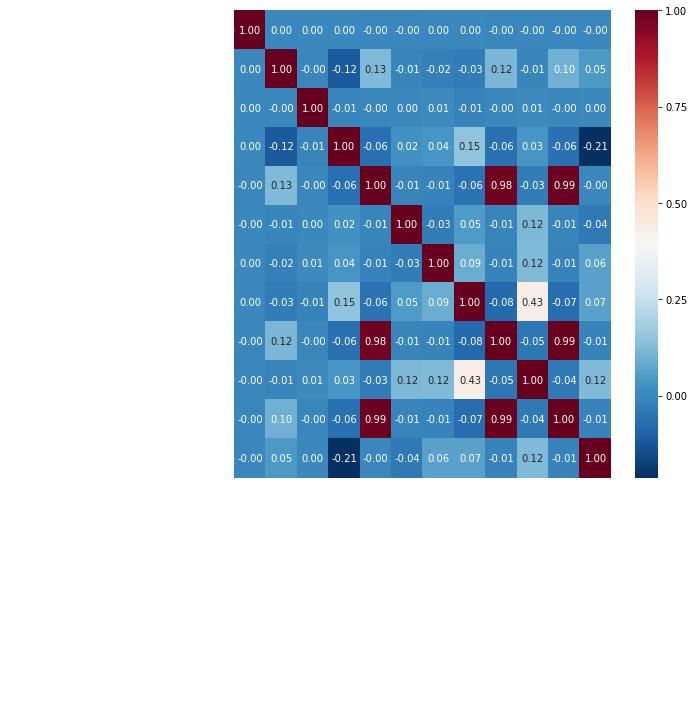

In [640]:
createCorrelationHeatMap(train_df)

<h3 style=color:red>Examining the Features</h3>

<h4 style=color:red>SeriousDlqin2yrs</h4>

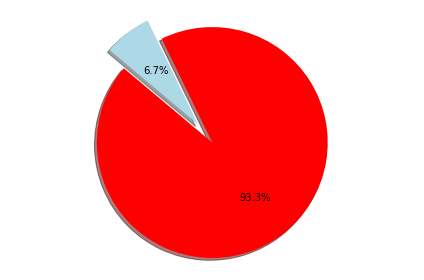

,SeriousDlqin2yrs,Count,percent
0,0.00,139974.00,93.32
1,1.00,10026.00,6.68


In [641]:
nos = sum(train_df["SeriousDlqin2yrs"] == 0);
yeses = sum(train_df["SeriousDlqin2yrs"] == 1);
total = len(train_df["SeriousDlqin2yrs"]);

# Data to plot
labels = 'NO', 'YES'
sizes = [nos, yeses]
colors = ['red', 'lightblue']
explode = (0.2, 0)  # explode 1st slice

# Plot
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140);

for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('black')
    
plt.axis('equal');                   # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout();
plt.show();

percent = train_df.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()
percent['percent'] = 100 * percent['ID'] / percent['ID'].sum()
percent.rename(columns={'ID':'Count'}, inplace=True)
display(HTML(tabulate.tabulate(percent, headers=percent.columns, floatfmt=".2f", tablefmt='html')))

<h4 style=color:red>age</h4>

In [642]:
train_df.loc[train_df['age'] < 21]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


<p style=color:red>There is one data point with an age value of zero. Resetting this value to the median.</p>

In [643]:
#train_df.loc[train_df['age'] == 0, 'age'] = train_df['age'].median()

In [644]:
age_workforce = train_df.loc[(train_df['age'] >= 21) & (train_df['age'] <= 65)]
age_retired = train_df.loc[(train_df['age'] > 65)]
print("workforce ave salary:" + str(round(age_workforce['MonthlyIncome'].mean(),0)))
print("retiree ave salary:" + str(round(age_retired['MonthlyIncome'].mean(),0)))
print("workforce median salary:" + str(round(age_workforce['MonthlyIncome'].median(),0)))
print("retiree median salary:" + str(round(age_retired['MonthlyIncome'].median(),0)))

workforce ave salary:6770.0
retiree ave salary:6180.0
workforce median salary:5500.0
retiree median salary:4968.0


<h4 style=color:red>NumberOfDependents</h4>

In [645]:
df_results = examinePercentiles(train_df['NumberOfDependents'], 0.99,  0.001)
df_results

,Percentile,# Examples to Percentile,# Examples in bin,Example Level
0,0.991,145085.0,145085.0,4.0
1,0.992,145085.0,0.0,4.0
2,0.993,145085.0,0.0,4.0
3,0.994,145831.0,746.0,5.0
4,0.995,145831.0,0.0,5.0
5,0.996,145831.0,0.0,5.0
6,0.997,145831.0,0.0,5.0
7,0.998,145831.0,0.0,5.0
8,0.999,145989.0,158.0,6.0
9,1.000,146076.0,87.0,20.0


In [646]:
train_df['NumberOfDependents'].value_counts().sort_index()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

<h4 style=color:red>NumberOfTime30-59DaysPastDueNotWorse</h4>

In [647]:
train_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [648]:
df_results = examinePercentiles(train_df['NumberOfTime30-59DaysPastDueNotWorse'], 0.99,  0.001)
df_results

,Percentile,# Examples to Percentile,# Examples in bin,Example Level
0,0.991,149150.0,149150.0,4.0
1,0.992,149150.0,0.0,4.0
2,0.993,149150.0,0.0,4.0
3,0.994,149150.0,0.0,4.0
4,0.995,149492.0,342.0,5.0
5,0.996,149492.0,0.0,5.0
6,0.997,149632.0,140.0,6.0
7,0.998,149711.0,79.0,8.0
8,0.999,150000.0,289.0,98.0
9,1.000,150000.0,0.0,98.0


<h4 style=color:red>NumberOfTimes90DaysLate</h4>

In [649]:
train_df['NumberOfTimes90DaysLate'].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [650]:
df_results = examinePercentiles(train_df['NumberOfTimes90DaysLate'], 0.99,  0.001)
df_results

,Percentile,# Examples to Percentile,# Examples in bin,Example Level
0,0.991,149127.0,149127.0,3.0
1,0.992,149127.0,0.0,3.0
2,0.993,149127.0,0.0,3.0
3,0.994,149127.0,0.0,3.0
4,0.995,149418.0,291.0,4.0
5,0.996,149418.0,0.0,4.0
6,0.997,149629.0,211.0,6.0
7,0.998,149707.0,78.0,9.0
8,0.999,150000.0,293.0,98.0
9,1.000,150000.0,0.0,98.0


<h4 style=color:red>NumberOfTime60-89DaysPastDueNotWorse</h4>

In [651]:
train_df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [652]:
df_results = examinePercentiles(train_df['NumberOfTime60-89DaysPastDueNotWorse'], 0.99,  0.001)
df_results

,Percentile,# Examples to Percentile,# Examples in bin,Example Level
0,0.991,149245.0,149245.0,2.0
1,0.992,149245.0,0.0,2.0
2,0.993,149245.0,0.0,2.0
3,0.994,149245.0,0.0,2.0
4,0.995,149563.0,318.0,3.0
5,0.996,149563.0,0.0,3.0
6,0.997,149563.0,0.0,3.0
7,0.998,149702.0,139.0,5.0
8,0.999,150000.0,298.0,98.0
9,1.000,150000.0,0.0,98.0


In [653]:
def replaceSpuriousValues96and98(data):
    """ Purpose: To replace the example values 96 or 98 with the median from the feature. """
    # Remove the 96 and 98 values from the median calculation.
    new_data = data[data!=96]
    new_data = new_data[new_data!=98]
    
    new = []
    newval = new_data.median()
    for i in data:
        if (i == 96 or i == 98):
            new.append(newval)
        else:
            new.append(i)
    return new

train_df['NumberOfTime30-59DaysPastDueNotWorse'] = replaceSpuriousValues96and98(train_df['NumberOfTime30-59DaysPastDueNotWorse'])
train_df['NumberOfTimes90DaysLate'] = replaceSpuriousValues96and98(train_df['NumberOfTimes90DaysLate'])
train_df['NumberOfTime60-89DaysPastDueNotWorse'] = replaceSpuriousValues96and98(train_df['NumberOfTime60-89DaysPastDueNotWorse'])


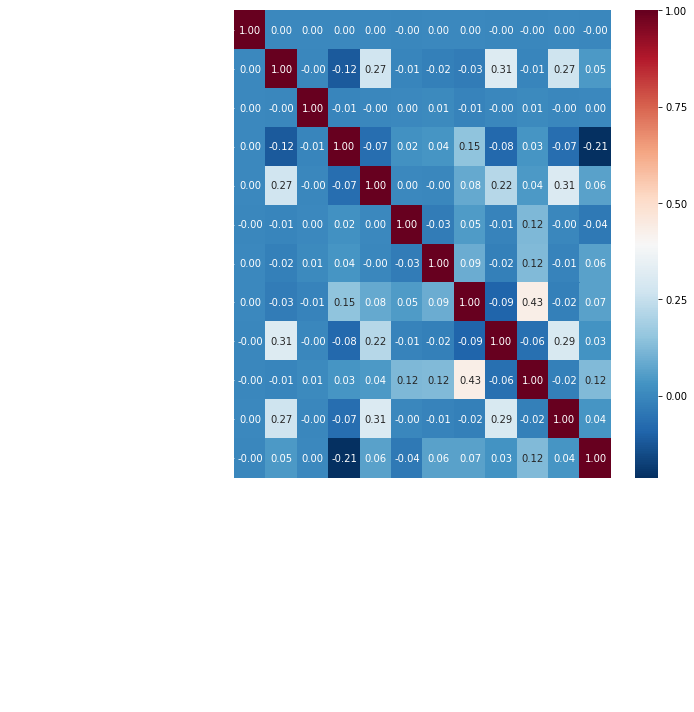

In [654]:
createCorrelationHeatMap(train_df)

<h3 style=color:red>Imputing</h3>

In [655]:
# Alter for both training and testing data.
train_df.loc[train_df['age'] == 0, 'age'] = train_df['age'].median()
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].replace(np.nan,train_df['MonthlyIncome'].median())
train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].median(), inplace=True)

test_df.loc[test_df['age'] == 0, 'age'] = test_df['age'].median()
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].replace(np.nan,test_df['MonthlyIncome'].mean())
test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].median(), inplace=True)

<h3 style=color:red>Model Training</h3>

In [656]:
X = train_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
y = train_df['SeriousDlqin2yrs']
W = test_df.drop(['SeriousDlqin2yrs', 'ID'],axis=1)
z = test_df['SeriousDlqin2yrs']

<h4 style=color:red>Cross Validation - two splits- training, test</h4>

In [657]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=111, test_size = 0.25)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


c:\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
c:\python37\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


<h4 style=color:red>Logistic Regression</h4>

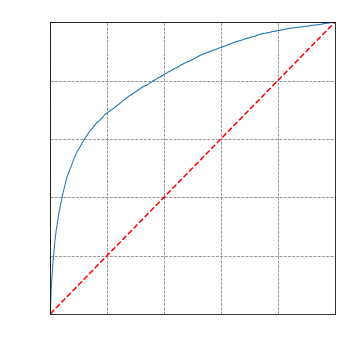

0.8161169959619179
AUC Score :  0.816117


In [658]:
# In sample fit:
import sklearn.metrics as metrics
logit = LogisticRegression(random_state=123, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)
##logit = LogisticRegression(random_state=123, solver='liblinear', penalty='l1', class_weight=None, C=1.0, max_iter=100, dual=False, tol=0.0001, fit_intercept=True,intercept_scaling=1,  multi_class='ovr', verbose=2)
#logit.fit(X_train, y_train)
logit.fit(X_train_scaled, y_train)
#logit_scores_proba = logit.predict_proba(X_test)
logit_scores_proba = logit.predict_proba(X_train_scaled)
preds = logit_scores_proba[:,1]  # predictions
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
#fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
plot_roc_curve(fpr,tpr)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
#print('AUC Score : ', round(roc_auc_score(y_test,preds),7))
print('AUC Score : ', round(roc_auc_score(y_train,preds),7))




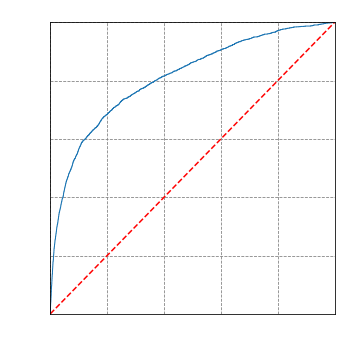

AUC Score :  0.8117421


In [659]:
# Out-of-sample - unseen test data.
logit_scores_proba_val = logit.predict_proba(X_test_scaled)
preds = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_test, preds)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print('AUC Score : ', round(roc_auc_score(y_test,preds),7))

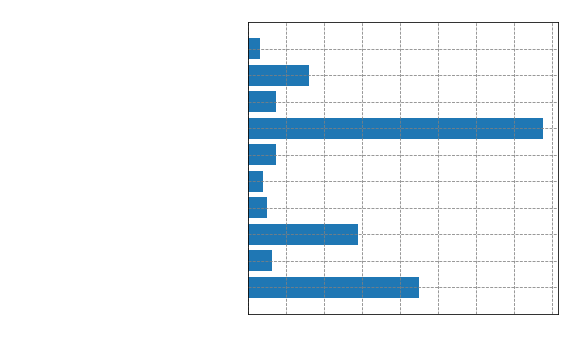

In [660]:
plot_feature_importances(clf)

c:\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


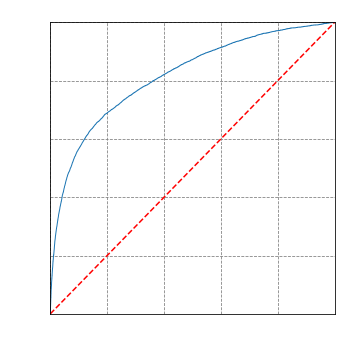

AUC Score :  0.8161166390096695


In [661]:
# Cross Validation
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(Cs=[1, 2, 5, 10], random_state=123, penalty='l1', solver='saga', class_weight='balanced', max_iter=500) # If Cs not specified, default=10.
clf.fit(X_train_scaled, y_train)
clf_scores_proba = clf.predict_proba(X_train_scaled)
clf_scores = clf_scores_proba[:,1]
fpr, tpr, threshold = roc_curve(y_train, clf_scores)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', (roc_auc_score(y_train,clf_scores)))


<h4 style=color:red>Decision Tree</h4>

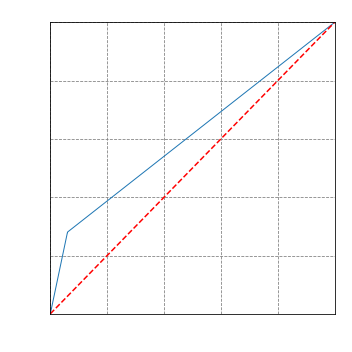

AUC Score :  0.6099597877115951


In [686]:
# Out-of-sample sample.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_scores_proba = clf.predict_proba(X_test)    # Predict class probabilities for X.
clf_preds = clf_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_test, clf_preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', (roc_auc_score(y_test,clf_preds)))

<h4 style=color:red>Random Forest</h4>

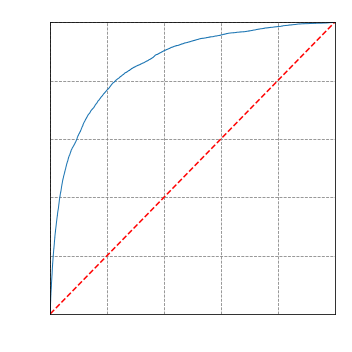

AUC Score :  0.8628088655540966


In [662]:
# Insample
clf = RandomForestClassifier(random_state=123, max_depth=3, n_estimators=300, class_weight='balanced')
clf.fit(X_train_scaled, y_train)
clf_scores_proba = clf.predict_proba(X_train_scaled)    # Predict class probabilities for X.
clf_preds = rf_scores_proba[::,1] # predictions
fpr, tpr, threshold = roc_curve(y_train, clf_preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', (roc_auc_score(y_train,clf_preds)))

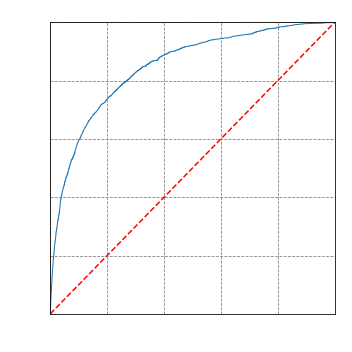

AUC Score :  0.8478913


In [663]:
# Out-of-sample - unseen test data.
clf_scores_proba_val = clf.predict_proba(X_test_scaled)
preds = clf_scores_proba_val[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', round(roc_auc_score(y_test,preds),7))

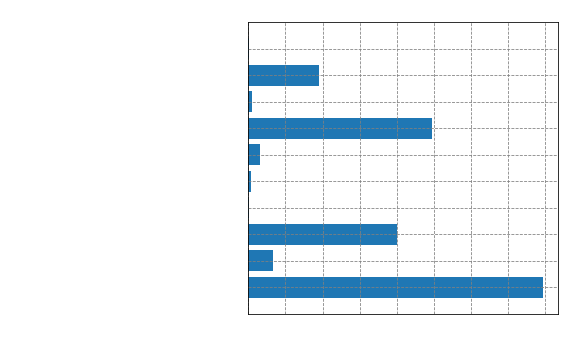

In [664]:
plot_feature_importances(clf)

<h4 style=color:red>Gradient Boosting</h4>

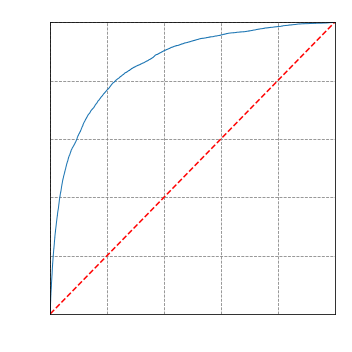

AUC Score :  0.8628088655540966


In [665]:
# In sample. (Using default constructor gave AUC: 0.8628)
clf = GradientBoostingClassifier( random_state=123, n_estimators=150, learning_rate=0.05, max_depth=5)
clf.fit(X_train_scaled, y_train)
clf_scores_proba = clf.predict_proba(X_train)    # Predict class probabilities for X.
clf_scores = clf_scores_proba[::,1]
fpr, tpr, thresh = roc_curve(y_train, rf_scores)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', (roc_auc_score(y_train,rf_scores)))

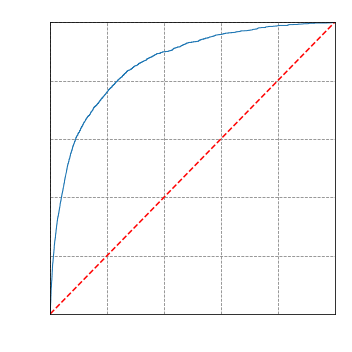

AUC Score :  0.8610031


In [666]:
# Out-of-sample - unseen test data.
clf_scores_proba_val = clf.predict_proba(X_test_scaled)
preds = clf_scores_proba_val[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', round(roc_auc_score(y_test,preds),7))

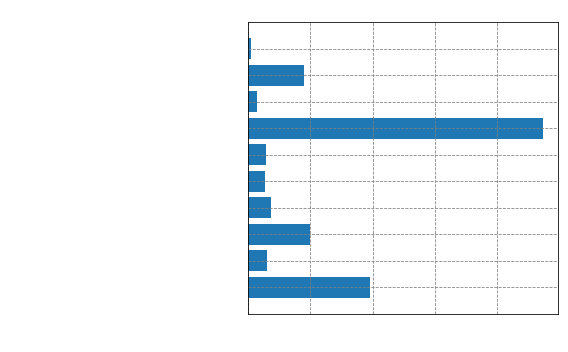

In [667]:
plot_feature_importances(clf)

In [668]:
clf = GradientBoostingClassifier(random_state=123, n_estimators=150, learning_rate=0.05 ,max_depth=4)
# Training:
clf.fit(X_train,y_train)
clf_proba = clf.predict_proba(X_train)
clf_scores = clf_proba[:,1]
# Real Testing Data:
clf_test_proba = clf.predict_proba(X_test)
clf_test_scores = clf_test_proba[:,1]

print('AUC Score (training) :', roc_auc_score(y_train, clf_scores))
print('AUC Score (test):', roc_auc_score(y_test, clf_test_scores))

AUC Score (training) : 0.871460921893158
AUC Score (test): 0.8604981177448999


In [669]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


def cvDictGen(functions, scr, X_train=X_train, y_train=y_train, cv=3, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict



clf_logit = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

clf_randomforest = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0)

clf_adaboost = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

clf_gradient_boost = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

cvD = cvDictGen(functions=[glmMod, adaMod, gbMod, rfMod], scr='roc_auc')





[LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s finished


<h4 style=color:red>XG Boost</h4>

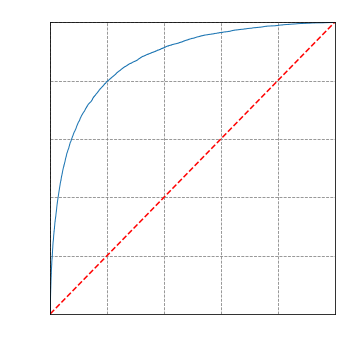

AUC Score :  0.8778794069503987


In [670]:
# In sample.
clf = XGBClassifier( random_state=123, n_estimators=150, learning_rate=0.05, max_depth=5)
clf.fit(X_train, y_train)
clf_scores_proba = clf.predict_proba(X_train)    # Predict class probabilities for X.
clf_preds = clf_scores_proba[::,1]
fpr, tpr, thresh = roc_curve(y_train, clf_preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', (roc_auc_score(y_train,clf_preds)))

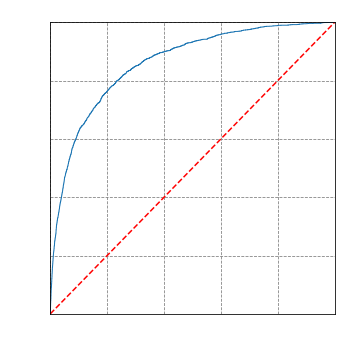

AUC Score :  0.8614554
Accuracy: 93.93%


In [671]:
# Out-of-sample - unseen test data.
clf_scores_proba_val = clf.predict_proba(X_test)
preds = clf_scores_proba_val[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', round(roc_auc_score(y_test,preds),7))

# evaluate predictions
y_pred = clf.predict(X_test)
preds = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

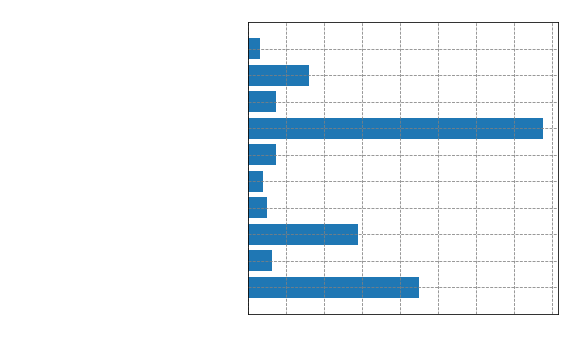

In [672]:
plot_feature_importances(clf)

<h4 style=color:red>Ensemble</h4>

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


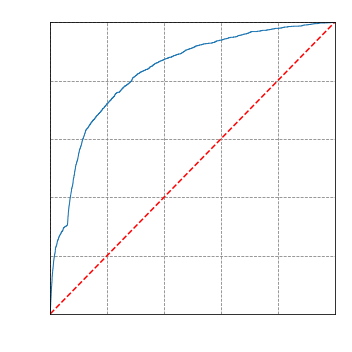

AUC Score :  0.8315623


In [689]:
# In sample.
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
pred1 = model1.predict_proba(X_test)    # Predict class probabilities for X.
model1.score(X_test,y_test)

import xgboost as xgb
model2 = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model2.fit(X_train, y_train)
pred2 = model2.predict_proba(X_test)
model2.score(X_test,y_test)

from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, y_train)
pred3 = model3.predict_proba(X_test)
model3.score(X_test,y_test)

finalpred = (pred1 + pred2 + pred3)/3

preds = finalpred[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', round(roc_auc_score(y_test,preds),7))

<h4 style=color:red>Stacking</h4>

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


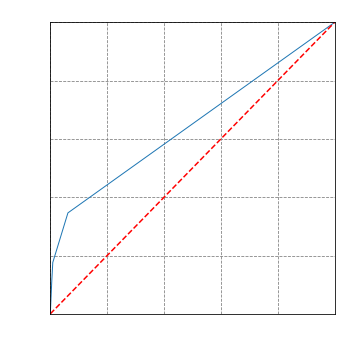

AUC Score :  0.6461922


In [690]:
# Two level Stacking model. 
# The decision tree and knn model at level zero.
# Logistic regression model  built at level one. 
from sklearn.model_selection import StratifiedKFold
def Stacking(model,train,y,test,n_fold):
    folds = StratifiedKFold(n_splits=n_fold,random_state=1)
    #test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    test_pred=np.empty((0,1),float)
        
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred

model1 = DecisionTreeClassifier(random_state=1)
test_pred1, train_pred1 = Stacking(model = model1, n_fold = 10, train = X_train, test = X_test, y = y_train)
train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

#model2 = KNeighborsClassifier()
model2 = XGBClassifier( random_state=123, n_estimators=150, learning_rate=0.05, max_depth=5)
test_pred2 , train_pred2 = Stacking(model = model2, n_fold = 10, train = X_train, test = X_test, y = y_train)
train_pred2 = pd.DataFrame(train_pred2)
test_pred2 = pd.DataFrame(test_pred2)

# Third model of Logistic regression using the predictions of the Decision Tree and knn models.
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=123)
model.fit(df,y_train)  # Use the X predictions from level 0 models.
model.score(df_test, y_test)


clf_scores_proba=model.predict_proba(df_test)
clf_preds = clf_scores_proba[:,1]
fpr, tpr, threshold = roc_curve(y_test, clf_preds)
plot_roc_curve(fpr,tpr)
print('AUC Score : ', round(roc_auc_score(y_test,clf_preds),7))